<a href="https://colab.research.google.com/github/ahtouw/AI-Platform-Engineering/blob/master/StagingProjects/AirlineTwitter/SentAnalysisTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis Project - US Airlines Tweets

The purpose of this project is to derive sentiment about airline companies from tweets made about these companies.

##Data Preparation

###Download Dataset from Kaggle

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install kaggle
!mkdir .kaggle
!mkdir ~/.kaggle

In [0]:
import json
token = {"username":"williamahtou","key":"40faa6e3f4d012c9b39cf9e96a731583"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment -p /content

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 86.2MB/s]


In [0]:
%%capture
!unzip \*.zip

In [0]:
!ls

database.sqlite  sample_data  Tweets.csv  twitter-airline-sentiment.zip


###Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TensorFlow 2.x selected.


In [0]:
df = pd.read_csv('Tweets.csv')

###Dataframe to SQL - for personal practice

In [0]:
import sqlite3

In [0]:
conn = sqlite3.connect('SADB.db') 
c = conn.cursor()

In [0]:
df.to_sql('SentimentTable', con=conn, if_exists='replace', index = False)

In [0]:
c.execute("SELECT airline_sentiment, airline FROM SentimentTable")

In [0]:
rows = c.fetchall()
 
for row in rows:
    print(row)

Streaming output truncated to the last 5000 lines.
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('neutral', 'US Airways')
('positive', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('positive', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('negative', 'US Airways')
('neg

In [0]:
c.close()
conn.close()

###Data Analysis

In [0]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
def distpieplt(datafr, alldata=False):
    sent_count = datafr.airline_sentiment.value_counts()
    print(sent_count)
    fig, ax = plt.subplots()
    if alldata:
        ax.set_title('Overall Data Distribrution', y=1.08)
    else:
        ax.set_title(datafr.airline.unique()[0]+' Data Distribution', y=1.08)
    ax.pie(sent_count, labels=sent_count.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax.axis('equal')
    plt.show()

In [0]:
airlines = df.airline.unique()

In [0]:
for airline in airlines:
    distpieplt(df[df.airline==airline])

In [0]:
def distgrpplt(df):
    airlines = df.airline.unique()
    neg_bar = []
    neut_bar = []
    pos_bar = []
    for airline in airlines:
        sent = df[df.airline==airline].airline_sentiment.value_counts()
        neg_bar.append(sent.negative)
        neut_bar.append(sent.neutral)
        pos_bar.append(sent.positive)

    barWidth = 0.3
    r1 = np.arange(len(neg_bar))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    plt.figure(figsize=(20,10))
    plt.bar(r1, neg_bar, color='#3f546e', width=barWidth, edgecolor='white', label='negative')
    plt.bar(r2, neut_bar, color='#879ab0', width=barWidth, edgecolor='white', label='neutral')
    plt.bar(r3, pos_bar, color='#a8c4e6', width=barWidth, edgecolor='white', label='positive')

    plt.xlabel('Airlines', fontweight='bold')
    plt.ylabel('Number of Tweets', fontweight='bold')
    plt.title('Airline Sentiment Distribution', fontsize=32,fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(pos_bar))], airlines)

    plt.legend()
    plt.show()

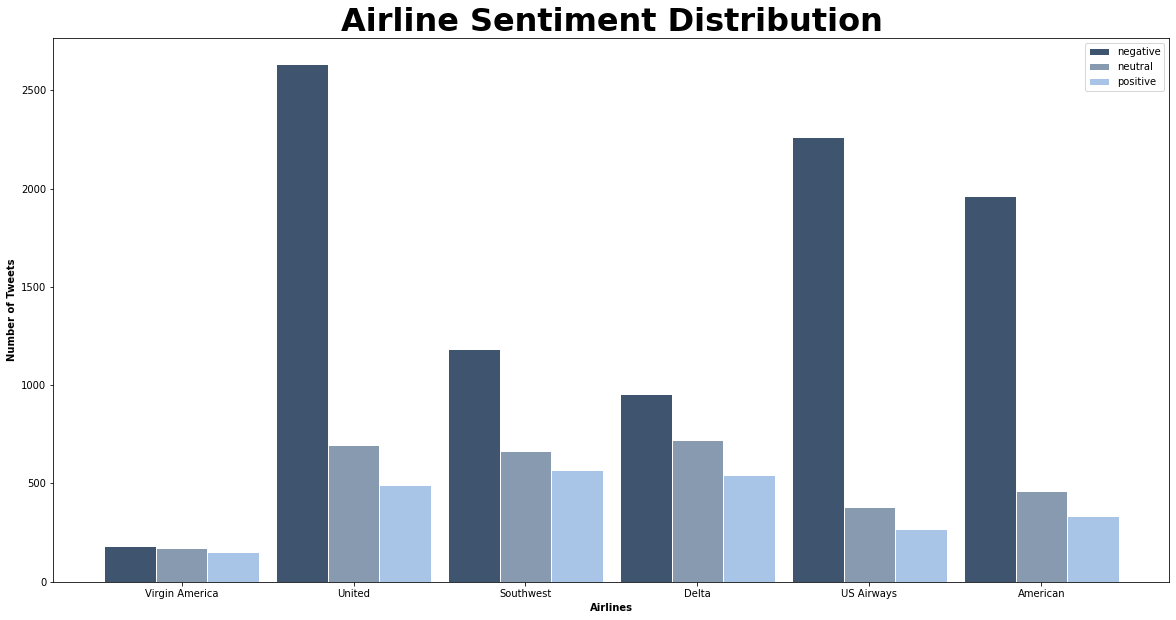

In [0]:
distgrpplt(df)

In [0]:
df.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [0]:
sent_gold = df[df.airline_sentiment_gold.notna()].reset_index(drop=True)

In [0]:
nng = sent_gold[sent_gold.airline_sentiment!='negative'].reset_index(drop=True, inplace=False)

In [0]:
nng.loc[3,['text']]

text    @southwestair - kind of early but any idea whe...
Name: 3, dtype: object

In [0]:
negreas_gold = df[df.negativereason_gold.notna()].reset_index()

In [0]:
negreas_gold.head()

,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
1,2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2,2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
3,2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
4,3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,negative,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)


In [0]:
negreas_gold.text[23]

"@AmericanAir  800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans."